# ***IDS 2020/2021 Final assignement***

## Author
  - *Federico Ciminelli* 

## Title
  - ***Soccer data analysis and visualization***

## Notebook context:
  - Data visualization

## Data source 
  - First part
    - [https://www.kaggle.com/hikne707/big-five-european-soccer-leagues](https://)
  - Second part
    - [https://github.com/statsbomb/open-data](https://)

## About 
  - This notebook is divided in two main parts, the first one extracts and shows some general data with different kind of plots, the second one is focused on a soccer match of Spanish championship (La Liga) occured in 2015/16 season.

## Notes:
  - Before start running the notebook, please load in the *file* section (on the page's left) the following files: `five_eu_leagues.csv` and `events.json`.
  - Be sure to run each cell of this notebook respecting their order to be able to see correct results.
  - If you want to easily navigate through the notebook switch the left palette to the *summary* one.

# Part one: General data extraction and visualization

## Data reading and manipulation
- Execute this cell to have an idea of the initial dataset

### Dataset's columns information
- [https://www.kaggle.com/hikne707/big-five-european-soccer-leagues](https://)

In [1]:
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = pd.read_csv('five_eu_leagues.csv',engine="python",encoding="utf-8")
all_matches = df.drop(['GGD', 'FT', 'HT'], axis='columns').rename(columns={ 'Team 1': 'home_team','Team 2': 'away_team','FT Team 1': 'FT_home','FT Team 2': 'FT_away',
                                                                            'HT Team 1': 'HT_home','HT Team 2': 'HT_away','Team 1 (pts)': 'home_pts','Team 2 (pts)': 'away_pts',
                                                                            'Round': 'round','Date': 'date', 'Year': 'year','Country': 'country' })
all_matches.head(10)

,round,date,home_team,away_team,year,country,FT_home,FT_away,HT_home,HT_away,home_pts,away_pts
0,1,(Sat) 19 Aug 1995 (W33),Aston Villa FC,Manchester United FC,1995,ENG,3,1,3,0,3,0
1,1,(Sat) 19 Aug 1995 (W33),Blackburn Rovers FC,Queens Park Rangers FC,1995,ENG,1,0,1,0,3,0
2,1,(Sat) 19 Aug 1995 (W33),Chelsea FC,Everton FC,1995,ENG,0,0,0,0,1,1
3,1,(Sat) 19 Aug 1995 (W33),Liverpool FC,Sheffield Wednesday FC,1995,ENG,1,0,0,0,3,0
4,1,(Sat) 19 Aug 1995 (W33),Manchester City FC,Tottenham Hotspur FC,1995,ENG,1,1,0,1,1,1
5,1,(Sat) 19 Aug 1995 (W33),Newcastle United FC,Coventry City FC,1995,ENG,3,0,1,0,3,0
6,1,(Sat) 19 Aug 1995 (W33),Southampton FC,Nottingham Forest FC,1995,ENG,3,4,1,3,0,3
7,1,(Sat) 19 Aug 1995 (W33),West Ham United FC,Leeds United FC,1995,ENG,1,2,1,0,0,3
8,1,(Sat) 19 Aug 1995 (W33),Wimbledon FC,Bolton Wanderers FC,1995,ENG,3,2,2,2,3,0
9,1,(Sun) 20 Aug 1995 (W33),Arsenal FC,Middlesbrough FC,1995,ENG,1,1,1,1,1,1


## Data extraction
- Creating a *Pandas DataFrame* which contains all main informations for all the matches stored in the dataset, execute this cell to have an idea of the new DataFrame created.
- This cell may need few seconds to be completely executed, please wait until it ends.

### Dataframe's columns informations
- `team` : `string`
  - Team name
- `country` : `string`
  - Country id, from `['ENG', 'FR', 'IT', 'GER', 'ESP']` set
- `tot_matches` : `int`
  - Number of total matches played by `team`
- `tot_wins` : `int`
  - Number of total matches won by `team`
- `tot_defeats` : `int`
  - Number of total matches lost by `team`
- `tot_draws` : `int`
  - Number of total matches drawn by `team`
- `tot_goal_scored` : `int`
  - Number of total goals scored by `team`
- `tot_goal_conceded` : `int`
  - Number of total goals conceded by `team`
- `tot_pts` : `int`
  - Number of total points earned by `team`
- `ratio_win` : `float`
  - Won matches out of total matches for `team`
- `ratio_defeat` : `float`
  - Lost matches out of total matches for `team`
- `ratio_scored` : `float`
  - Scored goals out of total matches for `team`
- `ratio_conceded` : `float`
  - Conceded goals out of total matches for `team`
- `home_matches` : `int`
  - Number of home matches played by `team`
- `away_matches` : `int`
  - Number of away matches played by `team`
- `home_wins` : `int`
  - Number of home matches won by `team`
- `away_wins` : `int`
  - Number of away matches won by `team`
- `ratio_home` : `float`
  - Won home matches out of total home matches for `team`
- `ratio_away` : `float`
  - Won away matches out of total away matches for `team`

In [2]:
all_teams = (all_matches.home_team.append(all_matches.away_team)).drop_duplicates()
overall_teams_stats = pd.DataFrame()

for t in all_teams:
  wins = all_matches[((all_matches.home_team == t) & (all_matches.FT_home > all_matches.FT_away)) | ((all_matches.away_team == t) & (all_matches.FT_home < all_matches.FT_away))]
  defeats = all_matches[((all_matches.home_team == t) & (all_matches.FT_home < all_matches.FT_away)) | ((all_matches.away_team == t) & (all_matches.FT_home > all_matches.FT_away))]
  draws = all_matches[((all_matches.home_team == t) & (all_matches.FT_home == all_matches.FT_away)) | ((all_matches.away_team == t) & (all_matches.FT_home == all_matches.FT_away))]

  home_matches = all_matches[(all_matches.home_team == t)]
  home_wins = home_matches[(home_matches.home_team == t) & (home_matches.FT_home > home_matches.FT_away)].shape[0]
  away_matches = all_matches[(all_matches.away_team == t)]
  away_wins = away_matches[(away_matches.away_team == t) & (away_matches.FT_home < away_matches.FT_away)].shape[0]
  tot_matches = home_matches.shape[0] + home_matches.shape[0]

  tot_scored = home_matches["FT_home"].sum() + away_matches["FT_away"].sum() 
  tot_conceded = home_matches["FT_away"].sum() + away_matches["FT_home"].sum()
  pts = home_matches["home_pts"].sum() + away_matches["away_pts"].sum()

  country = all_matches[(all_matches.home_team == t) | (all_matches.away_team == t)].iloc[0].country

  row = {'team': t,'country': country,'tot_matches': tot_matches,'tot_wins': wins.shape[0], 'tot_defeats': defeats.shape[0], 'tot_draws': draws.shape[0],
         'tot_goal_scored': tot_scored, 'tot_goal_conceded': tot_conceded,'tot_pts': pts, 'ratio_win':wins.shape[0]/tot_matches, 'ratio_defeat': defeats.shape[0]/tot_matches,
         'ratio_scored': tot_scored/tot_matches, 'ratio_conceded': tot_conceded/tot_matches, 'home_matches': home_matches.shape[0], 'away_matches': away_matches.shape[0],
         'home_wins':home_wins, 'away_wins':away_wins, 'ratio_home': home_wins/home_matches.shape[0], 'ratio_away': away_wins/away_matches.shape[0]}

  overall_teams_stats = overall_teams_stats.append(row, ignore_index=True)

overall_teams_stats.head(5)

,away_matches,away_wins,country,home_matches,home_wins,ratio_away,ratio_conceded,ratio_defeat,ratio_home,ratio_scored,ratio_win,team,tot_defeats,tot_draws,tot_goal_conceded,tot_goal_scored,tot_matches,tot_pts,tot_wins
0,414.0,110.0,ENG,412.0,166.0,0.265700,1.330097,0.375000,0.402913,1.209951,0.334951,Aston Villa FC,309.0,241.0,1096.0,997.0,824.0,1069.0,276.0
1,285.0,65.0,ENG,285.0,125.0,0.228070,1.378947,0.392982,0.438596,1.256140,0.333333,Blackburn Rovers FC,224.0,156.0,786.0,716.0,570.0,726.0,190.0
2,470.0,227.0,ENG,471.0,305.0,0.482979,0.933121,0.198514,0.647558,1.773885,0.564756,Chelsea FC,187.0,222.0,879.0,1671.0,942.0,1818.0,532.0
3,470.0,205.0,ENG,471.0,297.0,0.436170,0.976645,0.219745,0.630573,1.755839,0.532909,Liverpool FC,207.0,232.0,920.0,1654.0,942.0,1738.0,502.0
4,376.0,148.0,ENG,374.0,225.0,0.393617,1.125668,0.295455,0.601604,1.731283,0.498663,Manchester City FC,221.0,156.0,842.0,1295.0,748.0,1275.0,373.0


## General statistics

### Number of wins and number of defeats
- This section shows :
  - the 20 teams with highest number of wins 
  - the 20 teams with highest number of defeats

In [3]:
best_for_wins = overall_teams_stats.sort_values(by='ratio_win', ascending=False, inplace=False).head(20)
best_for_wins.head(20)
worst_for_defeats = overall_teams_stats.sort_values(by='ratio_defeat', ascending=False, inplace=False).head(20)
worst_for_defeats.head(20)


fig1 = make_subplots(
    rows=2, cols=1,
    column_widths=[1],
    row_heights=[0.5, 0.5],
    specs=[[{"type": "bar"}],
           [{"type": "bar"}]],
    subplot_titles=['Best 20 teams for percentage of wins', 'Worst 20 teams for percentage of loss']
)


fig1.add_trace(go.Bar(name = '', x=best_for_wins.team, y=best_for_wins.ratio_win, customdata=best_for_wins[['tot_wins', 'tot_matches']], 
                      hovertemplate='<b>Team: %{x}</b><br> Win percentage: %{y}<br>Won/total matches: %{customdata}'), row=1, col=1)
fig1.add_trace(go.Bar(name = '', x=worst_for_defeats.team, y=worst_for_defeats.ratio_defeat, customdata=worst_for_defeats[['tot_defeats', 'tot_matches']], 
                      hovertemplate='<b>Team: %{x}</b><br> Loss percentage: %{y}<br>Lost/total matches: %{customdata}'),  row=2, col=1)


fig1.update_layout(
    template="plotly_dark",
    margin=dict(r=10, t=25, b=40, l=60),
    showlegend = False,
    hoverlabel=dict(
        bgcolor="white"
    ),height=750
)

fig1.update_xaxes(tickangle=30)
fig1.show()

### Number of scored goals and number of conceded goals
- This section shows :
  - the 10 teams which scored the highest number of goals (best attack)
  - the 10 teams which scored the lowest number of goals (worst attack)
  - the 10 teams which conceded the lowest number of goals (best defense)
  - the 10 teams which conceded the highest number of goals (worst defense)

  

In [4]:
defense = overall_teams_stats.sort_values(by='ratio_conceded', ascending=True, inplace=False)
attack = overall_teams_stats.sort_values(by='ratio_scored', ascending=False, inplace=False)


fig2 = make_subplots(
    rows=2, cols=2,
    column_widths=[0.5, 0.5],
    row_heights=[0.5, 0.5],
    specs=[[{'type': 'scatter'},{'type': 'scatter'}],
           [{'type': 'scatter'},{'type': 'scatter'}]],
    subplot_titles=['The 10 teams with best attack', 'The 10 teams with worst attack', 'The 10 teams with best defense', 'The 10 teams with worst defense']
)

fig2.add_trace(go.Scatter(name = '', x = attack.team.head(10), y = attack.ratio_scored.head(10),
                          mode = 'markers', marker_size = [35]*10, 
                          customdata=attack[['tot_goal_scored', 'tot_matches']].head(10), 
                          hovertemplate='<b>Team: %{x}</b><br> Scored goals for match: %{y}<br>Scored goals/total matches: %{customdata}'),
                          row = 1, col = 1)
fig2.add_trace(go.Scatter(name = '', x = attack.team.tail(10), y = attack.ratio_scored.tail(10),
                          mode = 'markers', marker_size = [35]*10,
                          customdata=attack[['tot_goal_scored', 'tot_matches']].tail(10), 
                          hovertemplate='<b>Team: %{x}</b><br> Scored goals for match: %{y}<br>Scored goals/total matches: %{customdata}'),
                          row = 1, col = 2)
fig2.add_trace(go.Scatter(name = '', x = defense.team.head(10), y = defense.ratio_conceded.head(10),
                          mode = 'markers', marker_size = [35]*10,
                          customdata=defense[['tot_goal_conceded', 'tot_matches']].head(10), 
                          hovertemplate='<b>Team: %{x}</b><br> Conceded goals for match: %{y}<br>Conceded goals/total matches: %{customdata}'),
                          row = 2, col = 1)
fig2.add_trace(go.Scatter(name = '', x = defense.team.tail(10), y = defense.ratio_conceded.tail(10),
                          mode = 'markers', marker_size = [35]*10,
                          customdata=defense[['tot_goal_conceded', 'tot_matches']].tail(10), 
                          hovertemplate='<b>Team: %{x}</b><br> Conceded goals for match: %{y}<br>Conceded goals/total matches: %{customdata}'),
                          row = 2, col = 2)


fig2.update_layout(
    template="plotly_dark",
    margin=dict(r=10, t=35, b=50, l=60),
    showlegend = False,
    hoverlabel=dict(
        bgcolor="white"
    ),
    height= 750
)

fig2.update_xaxes(tickangle=20)
fig2.show()


### Number of home wins and number of away wins
- This section shows :
  - the 20 teams with highest number of home wins
  - the 20 teams with highest number of away wins

In [5]:
top_home = overall_teams_stats.sort_values(by='ratio_home', ascending=False, inplace=False).head(20)
top_away = overall_teams_stats.sort_values(by='ratio_away', ascending=False, inplace=False).head(20)


fig3 = make_subplots(
    rows=2, cols=1,
    column_widths=[1],
    row_heights=[0.5, 0.5],
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}]],
    subplot_titles=['The 20 teams with most home wins', 'The 20 teams with most away wins']
)

fig3.add_trace(go.Scatter(name = '', x = top_home.team, y = top_home.ratio_home,
                          mode = 'markers', marker_size = [40]*20, 
                          customdata=top_home[['home_wins','home_matches']], 
                          hovertemplate='<b>Team: %{x}</b><br> Home wins percentage: %{y}<br>Home wins/home matches: %{customdata}<br>'
                          ), row = 1, col = 1)

fig3.add_trace(go.Scatter(name = '', x = top_away.team, y = top_away.ratio_away,
                          mode = 'markers', marker_size = [40]*20, 
                          customdata=top_away[['away_wins','away_matches']], 
                          hovertemplate='<b>Team: %{x}</b><br> Away wins percentage: %{y}<br>Away wins/away matches: %{customdata}<br>'
                          ), row = 2, col = 1)

fig3.update_layout(
    template='plotly_dark',
    margin=dict(r=10, t=35, b=50, l=60),
    showlegend = False,
    hoverlabel=dict(
        bgcolor="white"
    ),
    height= 750
)

fig3.update_xaxes(tickangle=30)
fig3.show()


### Measuring home advantage
- This section shows : 
  - games where the team has gained points
  - games where the team has **not** gained points
  - the team has gained points while losing at the half time
  - the team has **not** gained points while losing at the half time

In [6]:
good_home_result_count = all_matches[(all_matches.FT_home >= all_matches.FT_away)].shape[0]
bad_home_result_count = all_matches[(all_matches.FT_home < all_matches.FT_away)].shape[0]
good_away_result_count = all_matches[(all_matches.FT_away >= all_matches.FT_home)].shape[0]
bad_away_result_count = all_matches[(all_matches.FT_away < all_matches.FT_home)].shape[0]

bad_start_good_finish_home_count = all_matches[(all_matches.HT_home < all_matches.HT_away) & (all_matches.FT_home >= all_matches.FT_away)].shape[0]
bad_start_bad_finish_home_count = all_matches[(all_matches.HT_home < all_matches.HT_away) & (all_matches.FT_home < all_matches.FT_away)].shape[0]
bad_start_good_finish_away_count = all_matches[(all_matches.HT_away < all_matches.HT_home) & (all_matches.FT_away >= all_matches.FT_home)].shape[0]
bad_start_bad_finish_away_count = all_matches[(all_matches.HT_away < all_matches.HT_home) & (all_matches.FT_away < all_matches.FT_home)].shape[0]

fig4 = make_subplots(
    rows=2, cols=2,
    column_widths=[0.5, 0.5],
    row_heights=[0.5,0.5],
    specs=[[{"type": "pie"}, {"type": "pie"}],
           [{'type':'pie'},{'type':'pie'}]],
    subplot_titles=['Home games', 'Away games', 'Home games', 'Away games']
)

labels = ['Games where the team has gained points', 'Games where the team has <b>not</b> gained points']
values = [good_home_result_count, bad_home_result_count]

fig4.add_trace(go.Pie(name = '', labels=labels, values=values, hole = .2), row = 1, col = 1)

values = [good_away_result_count, bad_away_result_count]
fig4.add_trace(go.Pie(name = '', labels=labels, values=values, hole = .2), row = 1, col = 2)

labels = ['The team has gained points while losing at the half time', 'The team has <b>not</b> gained points while losing at the half time']
values = [bad_start_good_finish_home_count, bad_start_bad_finish_home_count]
fig4.add_trace(go.Pie(name = '', labels=labels, values=values, hole = .2), row = 2, col = 1)

values = [bad_start_good_finish_away_count, bad_start_bad_finish_away_count]
fig4.add_trace(go.Pie(name = '', labels=labels, values=values, hole = .2), row = 2, col = 2)

fig4.update_layout(
    template='plotly_dark',
    showlegend = True,
    hoverlabel=dict(
        bgcolor="white"
    ),
    height = 700
)

fig4.show()

## Championships statistics

### Matches with highest difference between home goals and away goals
- This section shows the 10 *big goal* games for each championship

#### Premier League (ENG)

In [7]:
TRESHOLD = 6

premier_league = all_matches[(all_matches.country == 'ENG')]

epl_big_goals = pd.DataFrame()
for match in premier_league.itertuples():
  if (abs(match.FT_home - match.FT_away)) >= TRESHOLD:
    ft = str(match.FT_home) + '-' + str(match.FT_away)
    row = {'home_team':match.home_team, 'away_team':match.away_team, 'result': ft}
    epl_big_goals = epl_big_goals.append(row, ignore_index = True)

epl_big_goals.head(10)

,away_team,home_team,result
0,Manchester City FC,Liverpool FC,6-0
1,Nottingham Forest FC,Blackburn Rovers FC,7-0
2,Manchester United FC,Bolton Wanderers FC,0-6
3,Southampton FC,Everton FC,7-1
4,Tottenham Hotspur FC,Newcastle United FC,7-1
5,Chelsea FC,Barnsley FC,0-6
6,Barnsley FC,Manchester United FC,7-0
7,Barnsley FC,West Ham United FC,6-0
8,Southampton FC,Liverpool FC,7-1
9,Manchester United FC,Nottingham Forest FC,1-8


#### Serie A (ITA)

In [8]:
serieA = all_matches[(all_matches.country == 'IT')]

serieA_big_goals = pd.DataFrame()
for match in serieA.itertuples():
  if (abs(match.FT_home - match.FT_away)) >= TRESHOLD:
    ft = str(match.FT_home) + '-' + str(match.FT_away)
    row = {'home_team':match.home_team, 'away_team':match.away_team, 'result': ft}
    serieA_big_goals = serieA_big_goals.append(row, ignore_index = True)  

serieA_big_goals.head(10)

,away_team,home_team,result
0,Bari,Cremonese,7-1
1,Calcio Padova,FC Internazionale Milano,8-2
2,Cremonese,AC Milan,7-1
3,US Lecce,Udinese Calcio,6-0
4,US Lecce,FC Internazionale Milano,6-0
5,AC Milan,FC Internazionale Milano,0-6
6,Torino FC,AC Milan,6-0
7,Urbs Reggina,FC Internazionale Milano,6-0
8,SS Robur Siena,AS Roma,6-0
9,ACF Fiorentina,AC Milan,6-0


#### La Liga (ESP)

In [9]:
liga = all_matches[(all_matches.country == 'ESP')]

liga_big_goals = pd.DataFrame()
for match in liga.itertuples():
  if (abs(match.FT_home - match.FT_away)) >= TRESHOLD:
    ft = str(match.FT_home) + '-' + str(match.FT_away)
    row = {'home_team':match.home_team, 'away_team':match.away_team, 'result': ft}
    liga_big_goals = liga_big_goals.append(row, ignore_index = True) 

liga_big_goals.head(10)

,away_team,home_team,result
0,RCD La Coruña,Rayo Vallecano,0-6
1,Albacete Balompié,Real Sociedad,8-1
2,SD Compostela,CD Tenerife,6-0
3,Sporting Gijón,CD Tenerife,6-0
4,CD Logroñés,FC Barcelona,8-0
5,CD Logroñés,Athletic Club Bilbao,6-0
6,Rayo Vallecano,FC Barcelona,6-0
7,Valencia CF,UD Salamanca,6-0
8,Deportivo Alavés,FC Barcelona,7-1
9,FC Barcelona,Real Sociedad,0-6


#### Bundesliga (GER)

In [10]:
bundesliga = all_matches[(all_matches.country == 'GER')]

bundes_big_goals = pd.DataFrame()
for match in bundesliga.itertuples():
  if (abs(match.FT_home - match.FT_away)) >= TRESHOLD:
    ft = str(match.FT_home) + '-' + str(match.FT_away)
    row = {'home_team':match.home_team, 'away_team':match.away_team, 'result': ft}
    bundes_big_goals = bundes_big_goals.append(row, ignore_index = True) 

bundes_big_goals.head(10) 

,away_team,home_team,result
0,Eintracht Frankfurt,Borussia Dortmund,6-0
1,FC St. Pauli,VfL Bochum,6-0
2,Bayer 04 Leverkusen,Bor. Mönchengladbach,2-8
3,Bor. Mönchengladbach,VfL Wolfsburg,7-1
4,Bayer 04 Leverkusen,SSV Ulm 1846,1-9
5,1. FC Köln,VfL Wolfsburg,6-0
6,Energie Cottbus,Bayern München,6-0
7,Hamburger SV,Hertha BSC,6-0
8,TSV 1860 München,Hertha BSC,6-0
9,Bayern München,SC Freiburg,0-6


#### Ligue 1 (FRA)

In [11]:
ligue1 = all_matches[(all_matches.country == 'FR')]

ligue1_big_goals = pd.DataFrame()
for match in ligue1.itertuples():
  if (abs(match.FT_home - match.FT_away)) >= TRESHOLD:
    ft = str(match.FT_home) + '-' + str(match.FT_away)
    row = {'home_team':match.home_team, 'away_team':match.away_team, 'result': ft}
    ligue1_big_goals = ligue1_big_goals.append(row, ignore_index = True) 

ligue1_big_goals.head(10)

,away_team,home_team,result
0,OGC Nice,FC Nantes,7-0
1,Olympique Lyonnais,AJ Auxerre,7-0
2,Olympique de Marseille,Olympique Lyonnais,8-0
3,FC Metz,Girondins de Bordeaux,6-0
4,SC Bastia,RC Lens,7-0
5,ES Troyes AC,AS Monaco,6-0
6,FC Istres,Lille OSC,8-0
7,AJ Auxerre,RC Lens,7-0
8,Stade Rennais FC,AS Nancy Lorraine,6-0
9,AS Nancy Lorraine,Olympique de Marseille,6-0


### Seasonal draws trend
- This section shows the number of draws for each season for each championship

#### Premier League (ENG)

In [12]:
epl_match_per_season = premier_league.groupby('year', as_index = False).home_team.count()
epl_draws = premier_league[(premier_league.FT_home == premier_league.FT_away)].groupby('year', as_index = False).home_team.count()
epl_draws['total_matches'] = epl_match_per_season.home_team
epl_draws = epl_draws.rename(columns={'home_team':'draws_count'})

g = go.Figure()
g.add_trace(go.Scatter(x=epl_draws.year, y=epl_draws.draws_count, name='', mode = 'lines+markers', customdata=epl_draws.total_matches,
                       hovertemplate='Season: %{x}<br>Draws: %{y} <br> Total matches: %{customdata}'))
g.update_layout(
    title_text = 'Premier League draws trend',
    template='plotly_dark',
    height= 450
)
g.show()

#### Serie A (ITA)

In [13]:
serieA_match_per_season = serieA.groupby('year', as_index = False).home_team.count()
serieA_draws = serieA[(serieA.FT_home == serieA.FT_away)].groupby('year', as_index = False).home_team.count()
serieA_draws['total_matches'] = serieA_match_per_season.home_team
serieA_draws = serieA_draws.rename(columns={'home_team':'draws_count'})
serieA_match_per_season

g1 = go.Figure()
g1.add_trace(go.Scatter(x=serieA_draws.year, y=serieA_draws.draws_count, name='', mode = 'lines+markers', customdata=serieA_draws.total_matches,
                       hovertemplate='Season: %{x}<br>Draws: %{y} <br> Total matches: %{customdata}'))
g1.update_layout(
    title_text = 'Serie A draws trend',
    template='plotly_dark',
    height= 450
)
g1.show()

#### La Liga (ESP)

In [14]:
liga_match_per_season = liga.groupby('year', as_index = False).home_team.count()
liga_draws = liga[(liga.FT_home == liga.FT_away)].groupby('year', as_index = False).home_team.count()
liga_draws['total_matches'] = liga_match_per_season.home_team
liga_draws = liga_draws.rename(columns={'home_team':'draws_count'})

g2 = go.Figure()
g2.add_trace(go.Scatter(x=liga_draws.year, y=liga_draws.draws_count, name='', mode = 'lines+markers', customdata=liga_draws.total_matches,
                       hovertemplate='Season: %{x}<br> Draws: %{y} <br> Total matches: %{customdata}'))
g2.update_layout(
    title_text = 'La Liga draws trend',
    template='plotly_dark',
    height= 450
)
g2.show()

#### Bundesliga (GER)

In [15]:
bundesliga_match_per_season = bundesliga.groupby('year', as_index = False).home_team.count()
bundesliga_draws = bundesliga[(bundesliga.FT_home == bundesliga.FT_away)].groupby('year', as_index = False).home_team.count()
bundesliga_draws['total_matches'] = bundesliga_match_per_season.home_team
bundesliga_draws = bundesliga_draws.rename(columns={'home_team':'draws_count'})

g3 = go.Figure()
g3.add_trace(go.Scatter(x=bundesliga_draws.year, y=bundesliga_draws.draws_count, name='', mode = 'lines+markers', customdata=bundesliga_draws.total_matches,
                       hovertemplate='Season: %{x}<br>Draws: %{y} <br> Total matches: %{customdata}'))
g3.update_layout(
    title_text = 'Bundesliga draws trend',
    template='plotly_dark',
    height= 450
)
g3.show()

#### Ligue 1 (FRA)

In [16]:
ligue1_match_per_season = ligue1.groupby('year', as_index = False).home_team.count()
ligue1_draws = ligue1[(ligue1.FT_home == ligue1.FT_away)].groupby('year', as_index = False).home_team.count()
ligue1_draws['total_matches'] = ligue1_match_per_season.home_team
ligue1_draws = ligue1_draws.rename(columns={'home_team':'draws_count'})

g4 = go.Figure()
g4.add_trace(go.Scatter(x=ligue1_draws.year, y=ligue1_draws.draws_count, name='', mode = 'lines+markers', customdata=ligue1_draws.total_matches,
                       hovertemplate='Season: %{x}<br> Draws: %{y} <br> Total matches: %{customdata}'))
g4.update_layout(
    title_text = 'Ligue 1 draws trend',
    template='plotly_dark',
    height= 450
)
g4.show()

### Veteran teams and fresher teams
- This section shows, for each championship:
  - the list of the veteran teams, which are the teams with the highest number of played games
  - the list of the fresher teams, which are the teams with the lowest number of played games

#### Premier League (ENG)

In [17]:
vet_epl = overall_teams_stats[(overall_teams_stats.country == 'ENG')].sort_values(by='tot_matches', inplace = False, ascending = False)
fresh_epl = vet_epl.tail(10)
vet_epl = vet_epl.head(10)

fig = make_subplots(
    rows=2, cols=1,
    column_widths=[0.5],
    row_heights=[0.5, 0.5],
    specs=[[{"type": "bar"}],
           [{"type": "bar"}]],
    subplot_titles=['Premier League veterans', 'Premier League freshers']
)

fig.add_trace(go.Bar(name = '', x = vet_epl.team, y = vet_epl.tot_matches,
                     hovertemplate='<b>Team: %{x}</b><br> Games: %{y}'), row = 1, col = 1)

fig.add_trace(go.Bar(name = '', x = fresh_epl.team, y = fresh_epl.tot_matches,
                     hovertemplate='<b>Team: %{x}</b><br> Games: %{y}'), row = 2, col = 1)

fig.update_layout(
    template='plotly_dark',
    margin=dict(r=10, t=35, b=50, l=60),
    showlegend = False,
    hoverlabel=dict(bgcolor="white"),
    height= 550
)
fig.show()

#### Serie A (ITA)

In [18]:
vet_serieA = overall_teams_stats[(overall_teams_stats.country == 'IT')].sort_values(by='tot_matches', inplace = False, ascending = False)
fresh_serieA = vet_serieA.tail(10)
vet_serieA = vet_serieA.head(10)

fig = make_subplots(
    rows=2, cols=1,
    column_widths=[0.5],
    row_heights=[0.5, 0.5],
    specs=[[{"type": "bar"}],
           [{"type": "bar"}]],
    subplot_titles=['Serie A veterans', 'Serie A freshers']
)

fig.add_trace(go.Bar(name = '', x = vet_serieA.team, y = vet_serieA.tot_matches,
                     hovertemplate='<b>Team: %{x}</b><br> Games: %{y}'), row = 1, col = 1)

fig.add_trace(go.Bar(name = '', x = fresh_serieA.team, y = fresh_serieA.tot_matches,
                     hovertemplate='<b>Team: %{x}</b><br> Games: %{y}'), row = 2, col = 1)

fig.update_layout(
    template='plotly_dark',
    margin=dict(r=10, t=35, b=50, l=60),
    showlegend = False,
    hoverlabel=dict(bgcolor="white"),
    height= 550
)
fig.show()


#### La Liga (ESP)

In [19]:
vet_liga = overall_teams_stats[(overall_teams_stats.country == 'ESP')].sort_values(by='tot_matches', inplace = False, ascending = False)
fresh_liga = vet_liga.tail(10)
vet_liga = vet_liga.head(10)

fig = make_subplots(
    rows=2, cols=1,
    column_widths=[0.5],
    row_heights=[0.5, 0.5],
    specs=[[{"type": "bar"}],
           [{"type": "bar"}]],
    subplot_titles=['La Liga veterans', 'La Liga freshers']
)

fig.add_trace(go.Bar(name = '', x = vet_liga.team, y = vet_liga.tot_matches,
                     hovertemplate='<b>Team: %{x}</b><br> Games: %{y}'), row = 1, col = 1)

fig.add_trace(go.Bar(name = '', x = fresh_liga.team, y = fresh_liga.tot_matches,
                     hovertemplate='<b>Team: %{x}</b><br> Games: %{y}'), row = 2, col = 1)

fig.update_layout(
    template='plotly_dark',
    margin=dict(r=10, t=35, b=50, l=60),
    showlegend = False,
    hoverlabel=dict(
        bgcolor="white"
    ),
    height= 550
)
fig.show()

#### Bundesliga (GER)

In [20]:
vet_bundes = overall_teams_stats[(overall_teams_stats.country == 'GER')].sort_values(by='tot_matches', inplace = False, ascending = False)
fresh_bundes = vet_bundes.tail(10)
vet_bundes = vet_bundes.head(10)

fig = make_subplots(
    rows=2, cols=1,
    column_widths=[0.5],
    row_heights=[0.5, 0.5],
    specs=[[{"type": "bar"}],
           [{"type": "bar"}]],
    subplot_titles=['Bundesliga veterans', 'Bundesliga freshers']
)

fig.add_trace(go.Bar(name = '', x = vet_bundes.team, y = vet_bundes.tot_matches,
                     hovertemplate='<b>Team: %{x}</b><br> Games: %{y}'), row = 1, col = 1)

fig.add_trace(go.Bar(name = '', x = fresh_bundes.team, y = fresh_bundes.tot_matches,
                     hovertemplate='<b>Team: %{x}</b><br> Games: %{y}'), row = 2, col = 1)

fig.update_layout(
    template='plotly_dark',
    margin=dict(r=10, t=35, b=50, l=60),
    showlegend = False,
    hoverlabel=dict(
        bgcolor="white"
    ),
    height= 550
)
fig.show()

#### Ligue 1 (FRA)

In [21]:
vet_ligue1 = overall_teams_stats[(overall_teams_stats.country == 'FR')].sort_values(by='tot_matches', inplace = False, ascending = False)
fresh_ligue1 = vet_ligue1.tail(10)
vet_ligue1 = vet_ligue1.head(10)

fig = make_subplots(
    rows=2, cols=1,
    column_widths=[0.5],
    row_heights=[0.5, 0.5],
    specs=[[{"type": "bar"}],
           [{"type": "bar"}]],
    subplot_titles=['Ligue 1 veterans', 'Ligue 1 freshers']
)

fig.add_trace(go.Bar(name = '', x = vet_ligue1.team, y = vet_ligue1.tot_matches,
                     hovertemplate='<b>Team: %{x}</b><br> Games: %{y}'), row = 1, col = 1)

fig.add_trace(go.Bar(name = '', x = fresh_ligue1.team, y = fresh_ligue1.tot_matches,
                     hovertemplate='<b>Team: %{x}</b><br> Games: %{y}'), row = 2, col = 1)

fig.update_layout(
    template='plotly_dark',
    margin=dict(r=10, t=35, b=50, l=60),
    showlegend = False,
    hoverlabel=dict(
        bgcolor="white"
    ),
    height= 550
)
fig.show()

### 5 Team trend in 2018/19 season:
- This section shows:
  - Chelsea trend (Premier League)
  - Juventus trend (Serie A)
  - Real Madrid trend (La Liga)
  - Bayern Münich trend (Bundesliga)
  - Paris Saint-Germain trend (Ligue 1)

#### Chelsea (ENG)

In [22]:
team = 'Chelsea FC '
year = 2018
x = [i for i in range(1,39)]
chelsea = premier_league[((premier_league.home_team == team) | (premier_league.away_team == team)) & (premier_league.year == year)]
chelsea_trend = pd.DataFrame()

for match in chelsea.itertuples():
  if match.home_team == team:
    if match.home_pts == 3:
      chelsea_trend = chelsea_trend.append({'result': 'WIN  '},ignore_index=True)
    elif match.home_pts == 1:
      chelsea_trend = chelsea_trend.append({'result': 'DRAW  '},ignore_index=True)
    else:
      chelsea_trend = chelsea_trend.append({'result': 'DEFEAT  '},ignore_index=True)

  if match.away_team == team:
    if match.away_pts == 3:
      chelsea_trend = chelsea_trend.append({'result': 'WIN  '},ignore_index=True)
    elif match.away_pts == 1:
      chelsea_trend = chelsea_trend.append({'result': 'DRAW  '},ignore_index=True)
    else:
      chelsea_trend = chelsea_trend.append({'result': 'DEFEAT  '},ignore_index=True)

a = go.Figure()
a.add_trace(go.Scatter(x=x, y=chelsea_trend.result, name='', mode='lines+markers'))
a.update_layout(
    title_text = 'Chelsea trend in 2018/19 season',
    template='plotly_dark',
    height= 300
)
a['layout']['yaxis']['autorange'] = "reversed"
a.show()

#### Juventus (ITA)

In [23]:
team = 'Juventus '
year = 2018
juve = serieA[((serieA.home_team == team) | (serieA.away_team == team)) & (serieA.year == year)]
juve_trend = pd.DataFrame()

for match in juve.itertuples():
  if match.home_team == team:
    if match.home_pts == 3:
      juve_trend = juve_trend.append({'result': 'WIN  '},ignore_index=True)
    elif match.home_pts == 1:
      juve_trend = juve_trend.append({'result': 'DRAW  '},ignore_index=True)
    else:
      juve_trend = juve_trend.append({'result': 'DEFEAT  '},ignore_index=True)

  if match.away_team == team:
    if match.away_pts == 3:
      juve_trend = juve_trend.append({'result': 'WIN  '},ignore_index=True)
    elif match.away_pts == 1:
      juve_trend = juve_trend.append({'result': 'DRAW  '},ignore_index=True)
    else:
      juve_trend = juve_trend.append({'result': 'DEFEAT  '},ignore_index=True)


a = go.Figure()
a.add_trace(go.Scatter(x=x, y=juve_trend.result, name='', mode='lines+markers'))
a.update_layout(
    title_text = 'Juventus trend in 2018/19 season',
    template='plotly_dark',
    height= 300
)
a['layout']['yaxis']['autorange'] = "reversed"
a.show()

#### Real Madrid (ESP)

In [24]:
team = 'Real Madrid '
year = 2018
real = liga[((liga.home_team == team) | (liga.away_team == team)) & (liga.year == year)]
real_trend = pd.DataFrame()

for match in real.itertuples():
  if match.home_team == team:
    if match.home_pts == 3:
      real_trend = real_trend.append({'result': 'WIN  '},ignore_index=True)
    elif match.home_pts == 1:
      real_trend = real_trend.append({'result': 'DRAW  '},ignore_index=True)
    else:
      real_trend = real_trend.append({'result': 'DEFEAT  '},ignore_index=True)

  if match.away_team == team:
    if match.away_pts == 3:
      real_trend = real_trend.append({'result': 'WIN  '},ignore_index=True)
    elif match.away_pts == 1:
      real_trend = real_trend.append({'result': 'DRAW  '},ignore_index=True)
    else:
      real_trend = real_trend.append({'result': 'DEFEAT  '},ignore_index=True)


a = go.Figure()
a.add_trace(go.Scatter(x=x, y=real_trend.result, name='', mode='lines+markers'))
a.update_layout(
    title_text = 'Real Madrid trend in 2018/19 season',
    template='plotly_dark',
    height= 300
)
a['layout']['yaxis']['autorange'] = "reversed"
a.show()

#### Bayern Münich (GER)

In [25]:
team = 'Bayern München '
year = 2018
bayern = bundesliga[((bundesliga.home_team == team) | (bundesliga.away_team == team)) & (bundesliga.year == year)]
bayern_trend = pd.DataFrame()

for match in bayern.itertuples():
  if match.home_team == team:
    if match.home_pts == 3:
      bayern_trend = bayern_trend.append({'result': 'WIN  '},ignore_index=True)
    elif match.home_pts == 1:
      bayern_trend = bayern_trend.append({'result': 'DRAW  '},ignore_index=True)
    else:
      bayern_trend = bayern_trend.append({'result': 'DEFEAT  '},ignore_index=True)

  if match.away_team == team:
    if match.away_pts == 3:
      bayern_trend = bayern_trend.append({'result': 'WIN  '},ignore_index=True)
    elif match.away_pts == 1:
      bayern_trend = bayern_trend.append({'result': 'DRAW  '},ignore_index=True)
    else:
      bayern_trend = bayern_trend.append({'result': 'DEFEAT  '},ignore_index=True)


a = go.Figure()
a.add_trace(go.Scatter(x=x, y=bayern_trend.result, name='', mode='lines+markers'))
a.update_layout(
    title_text = 'Bayern Münich trend in 2018/19 season',
    template='plotly_dark',
    height= 300
)
a['layout']['yaxis']['autorange'] = "reversed"
a.show()

#### Paris Saint-Germain (FRA)

In [26]:
team = 'Paris Saint-Germain '
year = 2018
paris = ligue1[((ligue1.home_team == team) | (ligue1.away_team == team)) & (ligue1.year == year)]
paris_trend = pd.DataFrame()

for match in paris.itertuples():
  if match.home_team == team:
    if match.home_pts == 3:
      paris_trend = paris_trend.append({'result': 'WIN  '},ignore_index=True)
    elif match.home_pts == 1:
      paris_trend = paris_trend.append({'result': 'DRAW  '},ignore_index=True)
    else:
      paris_trend = paris_trend.append({'result': 'DEFEAT  '},ignore_index=True)

  if match.away_team == team:
    if match.away_pts == 3:
      paris_trend = paris_trend.append({'result': 'WIN  '},ignore_index=True)
    elif match.away_pts == 1:
      paris_trend = paris_trend.append({'result': 'DRAW  '},ignore_index=True)
    else:
      paris_trend = paris_trend.append({'result': 'DEFEAT  '},ignore_index=True)


a = go.Figure()
a.add_trace(go.Scatter(x=x, y=paris_trend.result, name='', mode='lines+markers'))
a.update_layout(
    title_text = 'Paris Saint-Germain trend in 2018/19 season',
    template='plotly_dark',
    height= 300
)
a['layout']['yaxis']['autorange'] = "reversed"
a.show()

## All time rankings

### All time global ranking
- This section shows the ranking of all the teams in the dataset, only the first 10 positions and the last 10 positions have been considered in the ranking

In [27]:
all_time_pts = overall_teams_stats.sort_values(by='tot_pts', inplace=False, ascending=False)

all_time = all_time_pts.head(15).append(all_time_pts.tail(15))

fig = go.Figure(go.Bar(name = '', x = all_time.tot_pts, y = all_time.team,
                     hovertemplate='Team: <b>%{y}</b><br> Points: <b>%{x}</b>',
                     orientation = 'h'))

fig.update_layout(
    title_text = 'All time ranking',
    template='plotly_dark',
    margin=dict(r=10, t=35, b=50, l=60),
    showlegend = False,
    hoverlabel=dict(
        bgcolor="white"
    ),
    height= 800
)
fig['layout']['yaxis']['autorange'] = "reversed"
fig.show()

### Premier League all time ranking 
- This section shows the ranking of Premier League championship, only the first 10 positions and the last 10 positions have been considered in the ranking

In [28]:
epl_all_time = all_time_pts[(all_time_pts.country == 'ENG')]
epl_all_time = epl_all_time.head(10).append(epl_all_time.tail(10))

fig = go.Figure(go.Bar(name = '', x = epl_all_time.tot_pts, y = epl_all_time.team,
                     hovertemplate='Team: <b>%{y}</b><br> Points: <b>%{x}</b>',
                     orientation = 'h'))

fig.update_layout(
    title_text = 'All-time Premier League ranking',
    template='plotly_dark',
    margin=dict(r=10, t=35, b=50, l=60),
    showlegend = False,
    hoverlabel=dict(
        bgcolor="white"
    ),
    height= 800
)
fig['layout']['yaxis']['autorange'] = "reversed"
fig.show()

### Serie A all time ranking

In [29]:
serieA_all_time = all_time_pts[(all_time_pts.country == 'IT')]
serieA_all_time = serieA_all_time.head(10).append(serieA_all_time.tail(10))

fig = go.Figure(go.Bar(name = '', x = serieA_all_time.tot_pts, y = serieA_all_time.team,
                     hovertemplate='Team: <b>%{y}</b><br> Points: <b>%{x}</b>',
                     orientation = 'h'))

fig.update_layout(
    title_text = 'All-time Serie A ranking',
    template='plotly_dark',
    margin=dict(r=10, t=35, b=50, l=60),
    showlegend = False,
    hoverlabel=dict(
        bgcolor="white"
    ),
    height= 800
)
fig['layout']['yaxis']['autorange'] = "reversed"
fig.show()

### La Liga all time ranking

In [30]:
liga_all_time = all_time_pts[(all_time_pts.country == 'ESP')]
liga_all_time = liga_all_time.head(10).append(liga_all_time.tail(10))

fig = go.Figure(go.Bar(name = '', x = liga_all_time.tot_pts, y = liga_all_time.team,
                     hovertemplate='Team: <b>%{y}</b><br> Points: <b>%{x}</b>',
                     orientation = 'h'))

fig.update_layout(
    title_text = 'All-time La Liga ranking',
    template='plotly_dark',
    margin=dict(r=10, t=35, b=50, l=60),
    showlegend = False,
    hoverlabel=dict(
        bgcolor="white"
    ),
    height= 800
)
fig['layout']['yaxis']['autorange'] = "reversed"
fig.show()

### Bundesliga all time ranking

In [31]:
bundesliga_all_time = all_time_pts[(all_time_pts.country == 'GER')]
bundesliga_all_time = bundesliga_all_time.head(10).append(bundesliga_all_time.tail(10))

fig = go.Figure(go.Bar(name = '', x = bundesliga_all_time.tot_pts, y = bundesliga_all_time.team,
                     hovertemplate='Team: <b>%{y}</b><br> Points: <b>%{x}</b>',
                     orientation = 'h'))

fig.update_layout(
    title_text = 'All-time Bundesliga ranking',
    template='plotly_dark',
    margin=dict(r=10, t=35, b=50, l=60),
    showlegend = False,
    hoverlabel=dict(
        bgcolor="white"
    ),
    height= 800
)
fig['layout']['yaxis']['autorange'] = "reversed"
fig.show()

### Ligue 1 all time ranking 

In [32]:
ligue1_all_time = all_time_pts[(all_time_pts.country == 'FR')]
ligue1_all_time = ligue1_all_time.head(10).append(ligue1_all_time.tail(10))

fig = go.Figure(go.Bar(name = '', x = ligue1_all_time.tot_pts, y = ligue1_all_time.team,
                     hovertemplate='Team: <b>%{y}</b><br> Points: <b>%{x}</b>',
                     orientation = 'h'))

fig.update_layout(
    title_text = 'All-time Ligue 1 ranking',
    template='plotly_dark',
    margin=dict(r=10, t=35, b=50, l=60),
    showlegend = False,
    hoverlabel=dict(
        bgcolor="white"
    ),
    height= 800
)
fig['layout']['yaxis']['autorange'] = "reversed"
fig.show()

# Part two: Basic match analysis for Real Madrid vs Barcelona in 2015/16 season

## Data reading and manipulation 
- Execute this section to have an idea of the initial dataset

### Dataset's columns information 
- [https://github.com/statsbomb/open-data/blob/master/doc/Open%20Data%20Events%20v4.0.0.pdf](https://)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 


df = pd.read_json('events.json')

df.rename(columns={'index':'idx', 'type':'evt_type', 'pass': 'pass_info'}, inplace=True)

barca_data = df[(df.idx == 1)].tactics
real_data = df[(df.idx == 2)].tactics

df.drop(columns=['id', 'timestamp', 'minute', 'second', 'duration', 'related_events', 'position',
                 'under_pressure', 'foul_committed', 'foul_won', 'counterpress', 'interception', 'clearance', 
                 'duel', 'out', 'bad_behaviour', 'goalkeeper', 'ball_recovery', 'block', 'substitution', 'off_camera', 
                 'tactics', 'dribble'], inplace=True)

df

,idx,period,evt_type,possession,possession_team,play_pattern,team,player,location,pass_info,carry,ball_receipt,shot
0,1,1,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 217, 'name': 'Barcelona'}","{'id': 1, 'name': 'Regular Play'}","{'id': 217, 'name': 'Barcelona'}",NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 217, 'name': 'Barcelona'}","{'id': 1, 'name': 'Regular Play'}","{'id': 220, 'name': 'Real Madrid'}",NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 217, 'name': 'Barcelona'}","{'id': 1, 'name': 'Regular Play'}","{'id': 220, 'name': 'Real Madrid'}",NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 217, 'name': 'Barcelona'}","{'id': 1, 'name': 'Regular Play'}","{'id': 217, 'name': 'Barcelona'}",NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"{'id': 30, 'name': 'Pass'}",2,"{'id': 217, 'name': 'Barcelona'}","{'id': 9, 'name': 'From Kick Off'}","{'id': 217, 'name': 'Barcelona'}","{'id': 5246, 'name': 'Luis Alberto Suárez Díaz'}","[60.0, 40.0]","{'recipient': {'id': 5503, 'name': 'Lionel And...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3697,3698,2,"{'id': 43, 'name': 'Carry'}",176,"{'id': 217, 'name': 'Barcelona'}","{'id': 1, 'name': 'Regular Play'}","{'id': 217, 'name': 'Barcelona'}","{'id': 5506, 'name': 'Javier Alejandro Mascher...","[10.9, 47.6]",NaN,"{'end_location': [18.7, 46.1]}",NaN,NaN
3698,3699,2,"{'id': 30, 'name': 'Pass'}",176,"{'id': 217, 'name': 'Barcelona'}","{'id': 1, 'name': 'Regular Play'}","{'id': 217, 'name': 'Barcelona'}","{'id': 5506, 'name': 'Javier Alejandro Mascher...","[18.7, 46.1]","{'recipient': {'id': 5213, 'name': 'Gerard Piq...",NaN,NaN,NaN
3699,3700,2,"{'id': 42, 'name': 'Ball Receipt*'}",176,"{'id': 217, 'name': 'Barcelona'}","{'id': 1, 'name': 'Regular Play'}","{'id': 217, 'name': 'Barcelona'}","{'id': 5213, 'name': 'Gerard Piqué Bernabéu'}","[44.3, 10.3]",NaN,NaN,"{'outcome': {'id': 9, 'name': 'Incomplete'}}",NaN
3700,3701,2,"{'id': 34, 'name': 'Half End'}",176,"{'id': 217, 'name': 'Barcelona'}","{'id': 1, 'name': 'Regular Play'}","{'id': 220, 'name': 'Real Madrid'}",NaN,NaN,NaN,NaN,NaN,NaN


## Data extraction
- This cell creates some small DataFrames that contains some crucial informations for their representation
- Execute to see an example of DataFrame created

In [ ]:
df.dropna(subset=['player'], inplace=True)

ronaldo_evt = pd.DataFrame()
messi_evt = pd.DataFrame()
modric_evt = pd.DataFrame()
rakitic_evt = pd.DataFrame()
for e in df.itertuples():
  if e.player['name'] == 'Lionel Andrés Messi Cuccittini':
    messi_evt = messi_evt.append({'evt_type':e.evt_type, 'location': e.location}, ignore_index=True)
  elif e.player['name'] == 'Cristiano Ronaldo dos Santos Aveiro':
    ronaldo_evt = ronaldo_evt.append({'evt_type':e.evt_type, 'location': e.location}, ignore_index=True)
  elif e.player['name'] == 'Luka Modrić':
    modric_evt = modric_evt.append({'evt_type':e.evt_type, 'location': e.location, 'pass_info':e.pass_info}, ignore_index=True)    
  elif e.player['name'] == 'Ivan Rakitić':
    rakitic_evt = rakitic_evt.append({'evt_type':e.evt_type, 'location': e.location, 'pass_info':e.pass_info}, ignore_index=True)


goal_positions = pd.DataFrame()
df.dropna(subset=['shot'], inplace=True)
for e in df.itertuples():
  if e.shot['outcome']['name'] == 'Goal':
    goal_positions = goal_positions.append({'player':e.player['name'], 'location':e.location, 'shot_info':e.shot}, ignore_index=True)

ronaldo_evt

,evt_type,location
0,"{'id': 42, 'name': 'Ball Receipt*'}","[57.4, 12.0]"
1,"{'id': 30, 'name': 'Pass'}","[55.7, 8.5]"
2,"{'id': 42, 'name': 'Ball Receipt*'}","[63.7, 5.6]"
3,"{'id': 42, 'name': 'Ball Receipt*'}","[71.6, 6.8]"
4,"{'id': 43, 'name': 'Carry'}","[71.6, 6.8]"
...,...,...
109,"{'id': 30, 'name': 'Pass'}","[52.3, 2.1]"
110,"{'id': 2, 'name': 'Ball Recovery'}","[14.2, 33.1]"
111,"{'id': 42, 'name': 'Ball Receipt*'}","[50.2, 2.4]"
112,"{'id': 43, 'name': 'Carry'}","[50.2, 2.4]"


## Definition of a function for the drawing of the football pitch and some other features
- If you are not interested about this part, before skipping to "PIPPO" part remember to execute all the below sections anyway in order to see the correct results.

### Function `create_pitch()` 

#### Function info
- Parameters :
  - `home` : `DataFrame`, default `None`
    - home team lineup, used only if is **not** `None`
  - `away` : `DataFrame`, default `None`
    - away team lineup, used only if is **not** `None`
  - `player`: `DataFrame`, default `None`
    - player informations to show, used only if is **not** `None`
  - `player_name`: `string`, default `None`
    - player name to display on the pitch if needed, used only if is **not** `None`
  - `passmap` : `boolean`, default `False`
    - flag useful to know which feature draw on the pitch
  - `goal` : `DataFrame`, default `None`
    - goal scorer informations, used only if is **not** `None`
  - `goal_info` : `DataFrame`, default `None`
    - informations about other players near the spot where the goal occurred, used only if is **not** `None`
  - `team` : `string`, default `None` 
    - team name to display on the pitch if needed, used only if is **not** `None`
  
- Output: 
  - It always draws the football pitch, then depending on the parameters it draws one of the other features, teams lineup - heat map - pass map - goal capture (which are defined in the cells below).
  

In [ ]:
def create_pitch(home = None, away = None, player = None, player_name = None, passmap = False, goal = None, goal_info = None, team = None):

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    fig.set_figwidth(20)
    fig.set_figheight(12)
    fig.set_facecolor('xkcd:grass')

    plt.plot([0,0],[0,90], color="white")
    plt.plot([0,130],[90,90], color="white")
    plt.plot([130,130],[90,0], color="white")
    plt.plot([130,0],[0,0], color="white")
    plt.plot([65,65],[0,90], color="white")    

    plt.plot([16.5,16.5],[65,25],color="white")
    plt.plot([0,16.5],[65,65],color="white")
    plt.plot([16.5,0],[25,25],color="white")    

    plt.plot([130,113.5],[65,65],color="white")
    plt.plot([113.5,113.5],[65,25],color="white")
    plt.plot([113.5,130],[25,25],color="white")    

    plt.plot([0,5.5],[54,54],color="white")
    plt.plot([5.5,5.5],[54,36],color="white")
    plt.plot([5.5,0.5],[36,36],color="white")    

    plt.plot([130,124.5],[54,54],color="white")
    plt.plot([124.5,124.5],[54,36],color="white")
    plt.plot([124.5,130],[36,36],color="white")    

    centre_circle = plt.Circle((65,45),9.15,color="white",fill=False)
    ax.add_patch(centre_circle)

    centre = plt.Circle((65,45),0.8,color="white")
    ax.add_patch(centre)    

    left_penalty = plt.Circle((11,45),0.8,color="white")
    ax.add_patch(left_penalty)

    right_penalty = plt.Circle((119,45),0.8,color="white")    
    ax.add_patch(right_penalty)    

    left_arc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="white")
    ax.add_patch(left_arc)

    right_arc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="white")
    ax.add_patch(right_arc)
    plt.axis('off')

    if home is not None:
        add_home(home, ax)
    if away is not None:
        add_away(away,ax)
    if player is not None and player_name is not None:
      if passmap:
        pass_map(player, player_name)
      else:
        heatmap(player, player_name)
    if goal is not None and goal_info is not None and team is not None:
      goal_picture(ax, goal, goal_info, team)

    return plt

### Function `add_home()`

#### Function info
- Parameters
  - `players`: `DataFrame`
    - home players lineup
  - `ax` : `matplotlib feature`
    - used to draw the circle that represents the players on the pitch
- Output
  - It adds the lineup for the home team, on the pitch

In [ ]:
def add_home(players, ax):
  for p in players.itertuples():
    if p.position == 'Goalkeeper':
      circle = plt.Circle((2.5,45),2,color="xkcd:dark grey")
      ax.add_patch(circle)
      label = str(p.number).split('.')
      ax.annotate(label[0], xy=(2,44.5), fontsize=12, color='white')
    elif p.position == 'Right Center Back':
      circle = plt.Circle((20,25),2,color="xkcd:dark grey")
      ax.add_patch(circle)
      label = str(p.number).split('.')
      ax.annotate(label[0], xy=(19.5,24.5), fontsize=12, color='white')
    elif p.position == 'Left Center Back':
      circle = plt.Circle((20,65),2,color="xkcd:dark grey")
      ax.add_patch(circle)
      label = str(p.number).split('.')
      ax.annotate(label[0], xy=(19.5,64.5), fontsize=12, color='white')
    elif p.position == 'Left Back':
      circle = plt.Circle((25,85),2,color="xkcd:dark grey")
      ax.add_patch(circle)
      label = str(p.number).split('.')
      ax.annotate(label[0], xy=(24.5,84.5), fontsize=12, color='white')
    elif p.position == 'Right Back':
      circle = plt.Circle((25,5),2,color="xkcd:dark grey")
      ax.add_patch(circle)
      label = str(p.number).split('.')
      ax.annotate(label[0], xy=(24.5,4.5), fontsize=12, color='white')
    elif p.position == 'Center Defensive Midfield':
      circle = plt.Circle((35,45),2,color="xkcd:dark grey")
      ax.add_patch(circle)
      label = str(p.number).split('.')
      ax.annotate(label[0], xy=(34.5,44.5), fontsize=12, color='white')
    elif p.position == 'Right Center Midfield':
      circle = plt.Circle((50,25),2,color="xkcd:dark grey")
      ax.add_patch(circle)
      label = str(p.number).split('.')
      ax.annotate(label[0], xy=(49.5,24.5), fontsize=12, color='white')
    elif p.position == 'Left Center Midfield':
      circle = plt.Circle((50,65),2,color="xkcd:dark grey")
      ax.add_patch(circle)
      label = str(p.number).split('.')
      ax.annotate(label[0], xy=(49.5,64.5), fontsize=12, color='white')
    elif p.position == 'Right Wing':
      circle = plt.Circle((60,5),2,color="xkcd:dark grey")
      ax.add_patch(circle)
      label = str(p.number).split('.')
      ax.annotate(label[0], xy=(59.5,4.5), fontsize=12, color='white')
    elif p.position == 'Left Wing':
      circle = plt.Circle((60,85),2,color="xkcd:dark grey")
      ax.add_patch(circle)
      label = str(p.number).split('.')
      ax.annotate(label[0], xy=(59.5,84.5), fontsize=12, color='white')
    elif p.position == 'Center Forward':
      circle = plt.Circle((60,45),2,color="xkcd:dark grey")
      ax.add_patch(circle)
      label = str(p.number).split('.')
      ax.annotate(label[0], xy=(59.5,44.5), fontsize=12, color='white')

### Function `add_away()`

#### Function info
- see `add_home()` function

In [ ]:
title = 'Real Madrid (433)   VS    FC Barcelona (433)'
def add_away(players, ax):
  plt.title(title, loc='center', fontdict=dict(fontsize=40))
  for p in players.itertuples():
    if p.position == 'Goalkeeper':
      circle = plt.Circle((127.5,45),2,color="xkcd:true blue")
      ax.add_patch(circle)
      label = str(p.number).split('.')
      ax.annotate(label[0], xy=(127,44.5), fontsize=12, color='white')
    elif p.position == 'Right Center Back':
      circle = plt.Circle((110,25),2,color="xkcd:true blue")
      ax.add_patch(circle)
      label = str(p.number).split('.')
      ax.annotate(label[0], xy=(109.5,24.5), fontsize=12, color='white')
    elif p.position == 'Left Center Back':
      circle = plt.Circle((110,65),2,color="xkcd:true blue")
      ax.add_patch(circle)
      label = str(p.number).split('.')
      ax.annotate(label[0], xy=(109.5,64.5), fontsize=12, color='white')
    elif p.position == 'Left Back':
      circle = plt.Circle((105,85),2,color="xkcd:true blue")
      ax.add_patch(circle)
      label = str(p.number).split('.')
      ax.annotate(label[0], xy=(104.5,84.5), fontsize=12, color='white')
    elif p.position == 'Right Back':
      circle = plt.Circle((105,5),2,color="xkcd:true blue")
      ax.add_patch(circle)
      label = str(p.number).split('.')
      ax.annotate(label[0], xy=(104.5,4.5), fontsize=12, color='white')
    elif p.position == 'Center Defensive Midfield':
      circle = plt.Circle((95,45),2,color="xkcd:true blue")
      ax.add_patch(circle)
      label = str(p.number).split('.')
      ax.annotate(label[0], xy=(94.5,44.5), fontsize=12, color='white')
    elif p.position == 'Right Center Midfield':
      circle = plt.Circle((80,25),2,color="xkcd:true blue")
      ax.add_patch(circle)
      label = str(p.number).split('.')
      ax.annotate(label[0], xy=(79.5,24.5), fontsize=12, color='white')
    elif p.position == 'Left Center Midfield':
      circle = plt.Circle((80,65),2,color="xkcd:true blue")
      ax.add_patch(circle)
      label = str(p.number).split('.')
      ax.annotate(label[0], xy=(79.5,64.5), fontsize=12, color='white')
    elif p.position == 'Right Wing':
      circle = plt.Circle((70,5),2,color="xkcd:true blue")
      ax.add_patch(circle)
      label = str(p.number).split('.')
      ax.annotate(label[0], xy=(69.5,4.5), fontsize=12, color='white')
    elif p.position == 'Left Wing':
      circle = plt.Circle((70,85),2,color="xkcd:true blue")
      ax.add_patch(circle)
      label = str(p.number).split('.')
      ax.annotate(label[0], xy=(69.5,84.5), fontsize=12, color='white')
    elif p.position == 'Center Forward':
      circle = plt.Circle((70,45),2,color="xkcd:true blue")
      ax.add_patch(circle)
      label = str(p.number).split('.')
      ax.annotate(label[0], xy=(69.5,44.5), fontsize=12, color='white')

### Function `heatmap()`

#### Function info
- Parameters
  - `data` : `DataFrame`
    - player locations for the heat map
  - `player` : `string`
    - player name

- Output
  - It adds to the pitch an heatmap for the positions stored in `data` parameter

In [ ]:
def heatmap(data, player):
  color = 'red'
  if player == 'ronaldo':
    plt.title('Shot heatmap for Cristiano Ronaldo', loc='center', fontdict=dict(fontsize=35))
  elif player == 'messi':
    plt.title('Shot heatmaps for Lionel Messi', loc='center', fontdict=dict(fontsize=35))
  elif player == 'modric':
    plt.title('Heatmap for Luka Modric', loc='center', fontdict=dict(fontsize=35))
    color = 'blue'
  elif player == 'rakitic':
    plt.title('Heatmap for Ivan Rakitic', loc='center', fontdict=dict(fontsize=35))
    color = 'blue'

  plt.ylim(0, 90)
  plt.xlim(0, 130)

  
  sns.kdeplot(data['x'],data['y'], shade=True,n_levels=100,color=color)

### Function `pass_map()`

#### Function info
- Parameters 
  - `data` : `dataframe`
    - start position and end position for each pass
  - `player` : `string`
    - player name

- Output
  - It adds to the pitch a pass map, for each location stored in `data`

In [ ]:
def pass_map(data, player):
  if player == 'modric':
    plt.title('Pass map for Luka Modric', loc='center', fontdict=dict(fontsize=35))
    color = 'xkcd:dark grey'
  elif player == 'rakitic':
    plt.title('Pass map for Ivan Rakitic', loc='center', fontdict=dict(fontsize=35))
    color = 'xkcd:true blue'

  plt.ylim(0, 90)
  plt.xlim(0, 130)

  for i in range(len(data)):
    plt.plot([int(data.x_start[i]),int(data.x_end[i])],[int(data.y_start[i]),int(data.y_end[i])], color='yellow')
    plt.plot(int(data.x_start[i]),int(data.y_start[i]),'o', color=color)

### Function `goal_picture()`


#### Function info
- Parameters
  - `ax` : `matplotlib feature`
    - used to draw the circle that represents the players on the pitch
  - `goal_scorer` : `DataFrame`
    - goal scorer informations such as position and name
  - `others` : `DataFrame`
    - players that were near the position from where the goal scorer scored the goal, used to create a picture at the moment of the goal
  - `team` : `string`
    - team of the goal scorer

- Output
  - It shows on the pitch the position of the goal scorer and all the others players near him, both team mates and opponents
  

In [ ]:
def goal_picture(ax, goal_scorer, others, team):
  circle = plt.Circle((goal_scorer.x_goal,goal_scorer.y_goal),0.1,color='xkcd:dark grey')
  ax.add_patch(circle)
  plt.plot([goal_scorer.x_goal, 130], [goal_scorer.y_goal, 45], color = 'yellow')

  player = goal_scorer.player.split()
  player = player[0] + ' ' + player[1]
  ax.annotate( team+' goal scored by '+player , xy=(2,78), fontsize=35, color='white')
  
  circle = plt.Circle((goal_scorer.x_goal,goal_scorer.y_goal),1,color='red')
  ax.add_patch(circle)

  for p in others.itertuples():
    if team == 'Real Madrid':
      if p.is_teammate == 1:
        circle = plt.Circle((p.x_other,p.y_other),1,color='xkcd:dark grey')
        ax.add_patch(circle)
      else:
        circle = plt.Circle((p.x_other,p.y_other),1,color='xkcd:true blue')
        ax.add_patch(circle)
    else:
      if p.is_teammate == 1:
        circle = plt.Circle((p.x_other,p.y_other),1,color='xkcd:dark grey')
        ax.add_patch(circle)
      else:
        circle = plt.Circle((p.x_other,p.y_other),1,color='xkcd:true blue')
        ax.add_patch(circle) 



## Starting XI 
- The following cells shows the starting lineup for both teams and also theri disposition on the pitch

### Real Madrid starting lineup

In [ ]:
real = pd.DataFrame()
for p in real_data.iloc[0]['lineup']:
  real = real.append({
      'name': p['player']['name'],
      'position': p['position']['name'],
      'number': p['jersey_number']}, ignore_index=True)
real.head(11)

,name,number,position
0,Keylor Navas Gamboa,1.0,Goalkeeper
1,Daniel Carvajal Ramos,15.0,Right Back
2,Kléper Laveran Lima Ferreira,3.0,Right Center Back
3,Sergio Ramos García,4.0,Left Center Back
4,Marcelo Vieira da Silva Júnior,12.0,Left Back
5,Carlos Henrique Casimiro,14.0,Center Defensive Midfield
6,Luka Modrić,19.0,Right Center Midfield
7,Toni Kroos,8.0,Left Center Midfield
8,Gareth Frank Bale,11.0,Right Wing
9,Cristiano Ronaldo dos Santos Aveiro,7.0,Left Wing


### Barcelona starting lineup

In [ ]:
barca = pd.DataFrame()
for p in barca_data.iloc[0]['lineup']:
  barca = barca.append({
      'name': p['player']['name'],
      'position': p['position']['name'],
      'number': p['jersey_number']}, ignore_index=True)
  
df.drop(df[(df.idx < 5)].index, inplace=True)
df.drop(df[( df.idx  > 3700)].index, inplace=True)
barca.head(11)

,name,number,position
0,Claudio Andrés Bravo Muñoz,13.0,Goalkeeper
1,Daniel Alves da Silva,6.0,Right Back
2,Gerard Piqué Bernabéu,3.0,Right Center Back
3,Javier Alejandro Mascherano,14.0,Left Center Back
4,Jordi Alba Ramos,18.0,Left Back
5,Sergio Busquets i Burgos,5.0,Center Defensive Midfield
6,Ivan Rakitić,4.0,Right Center Midfield
7,Andrés Iniesta Luján,8.0,Left Center Midfield
8,Luis Alberto Suárez Díaz,9.0,Right Wing
9,Neymar da Silva Santos Junior,11.0,Left Wing


### Teams disposition on the pitch

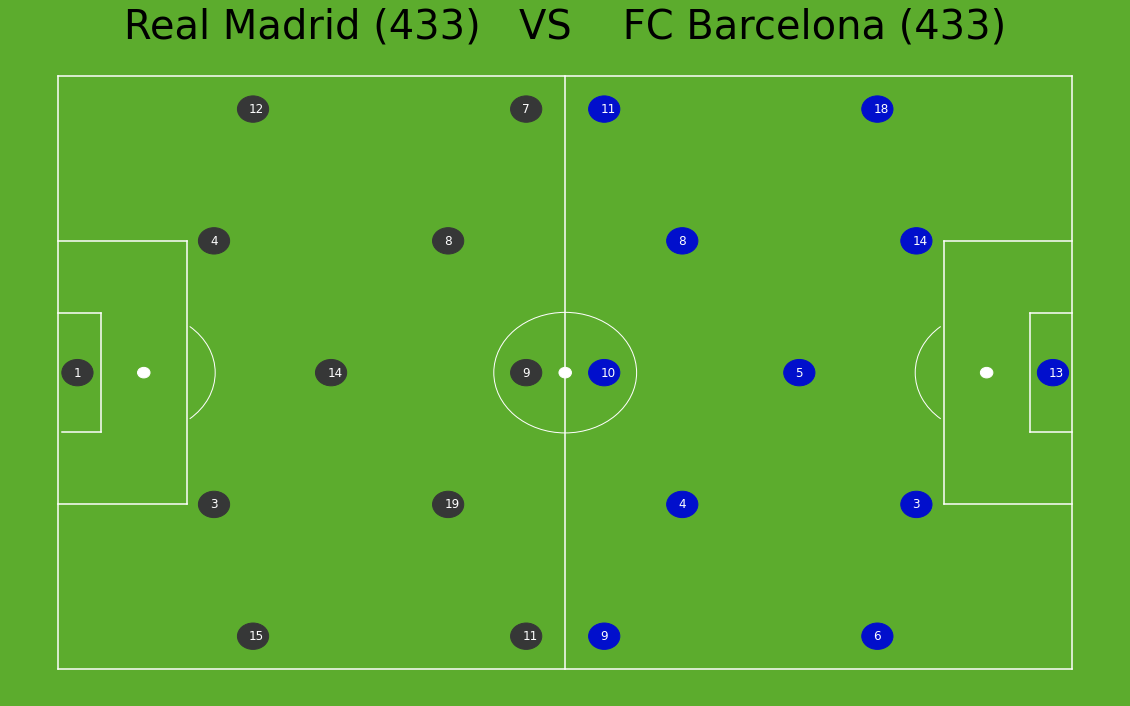

In [ ]:
create_pitch(home=real, away=barca).show()

## Pitch coverage for Luka Modric and Ivan Rakitic

### Luka Modric (Real Madrid)

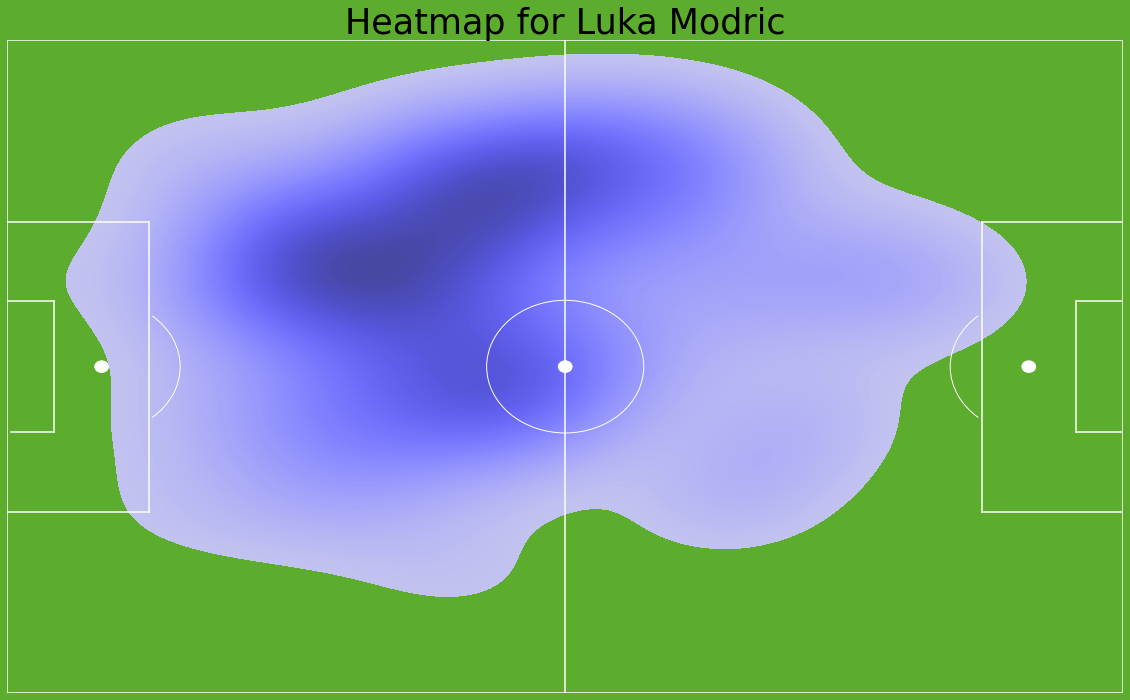

In [ ]:
modric_XY = pd.DataFrame()
modric_evt.dropna(subset=['location'], inplace=True)
for e in modric_evt.itertuples():
  modric_XY = modric_XY.append({'x':e.location[0], 'y':e.location[1]},  ignore_index=True)


create_pitch(player=modric_XY, player_name='modric').show()

### Ivan Rakitic (Barcelona)

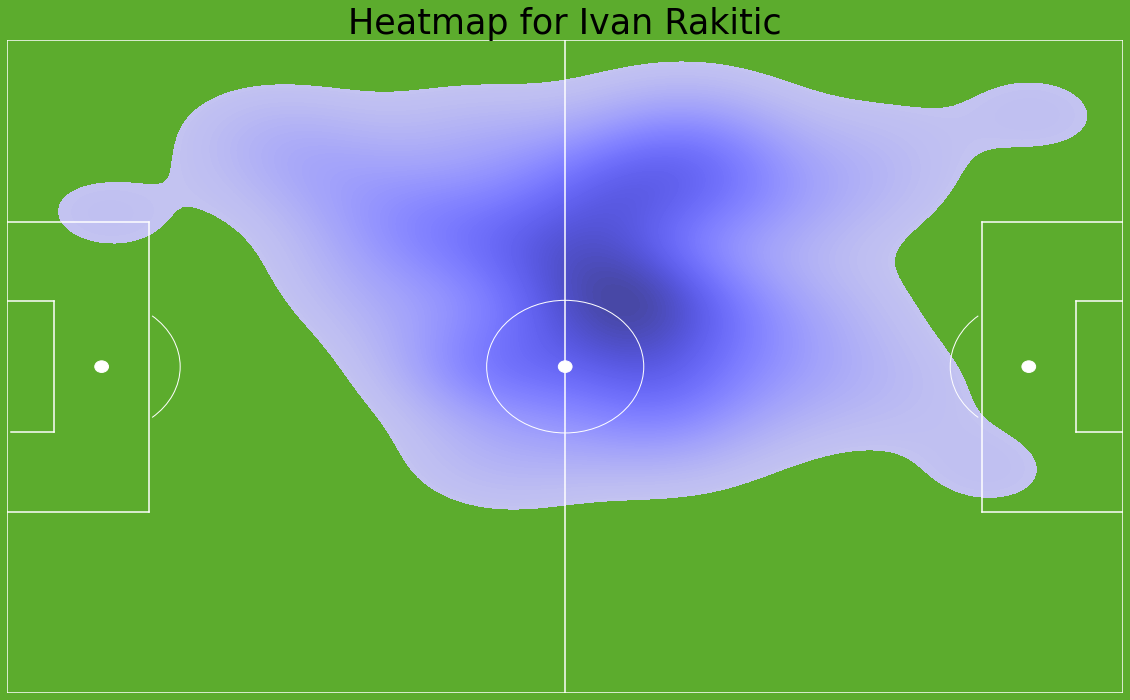

In [ ]:
rakitic_XY = pd.DataFrame()
rakitic_evt.dropna(subset=['location'], inplace=True)
for e in rakitic_evt.itertuples():
  rakitic_XY = rakitic_XY.append({'x':e.location[0], 'y':e.location[1]},  ignore_index=True)
create_pitch(player=rakitic_XY, player_name='rakitic').show()

## Pass map for Luka Modric and Ivan Rakitic

### Luka Modric (Real Madrid)

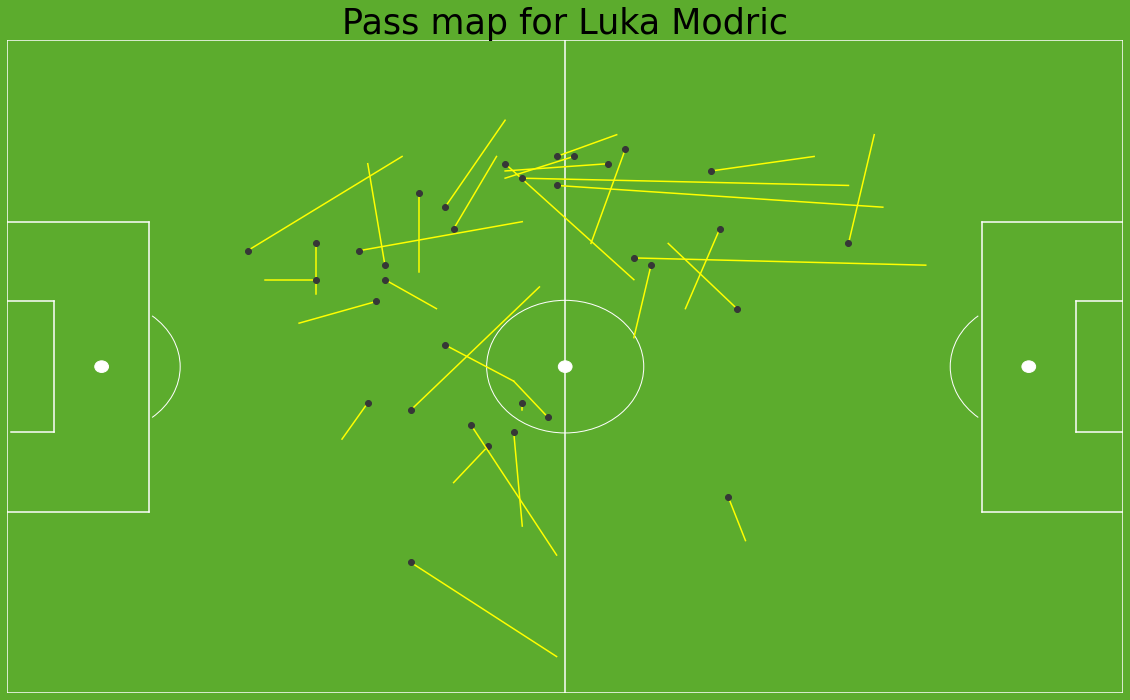

In [ ]:
modric_pass = pd.DataFrame()
modric_evt.dropna(subset=['location', 'pass_info'], inplace=True)
for e in modric_evt.itertuples():
  modric_pass = modric_pass.append({'x_start':e.location[0], 'y_start':e.location[1], 'x_end': e.pass_info['end_location'][0], 'y_end':e.pass_info['end_location'][1]},  ignore_index=True)

create_pitch(player=modric_pass, player_name='modric',passmap=True).show()

### Ivan Rakitic (Barcelona)

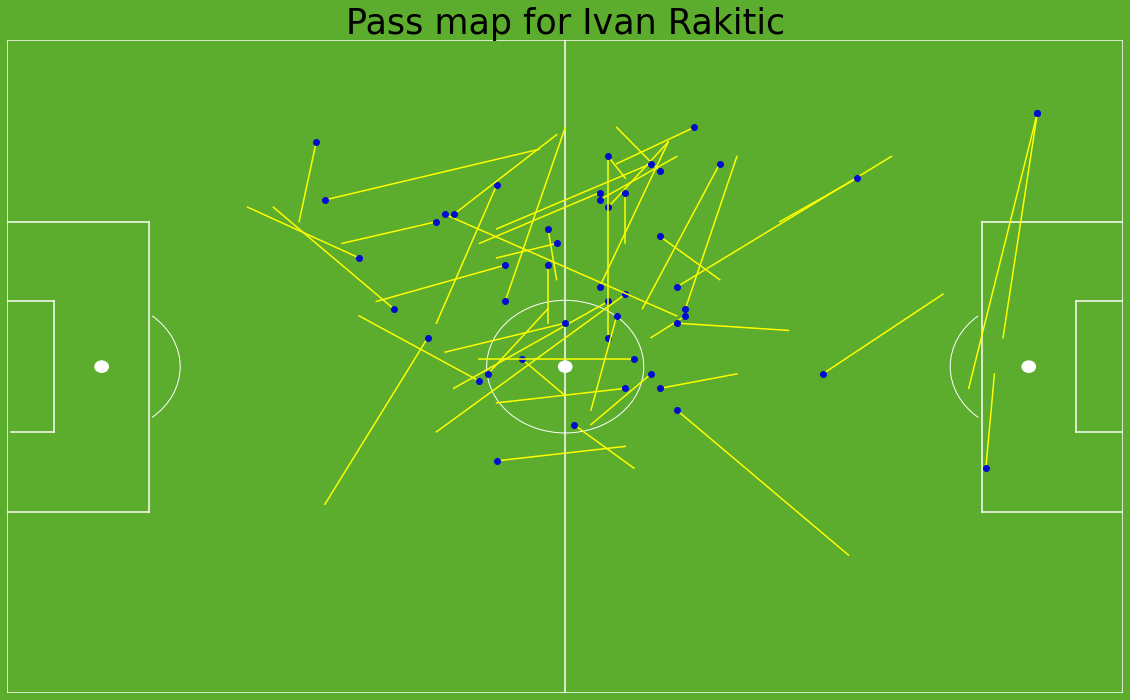

In [ ]:
rakitic_pass = pd.DataFrame()
rakitic_evt.dropna(subset=['location', 'pass_info'], inplace=True)
for e in rakitic_evt.itertuples():
  rakitic_pass = rakitic_pass.append({'x_start':e.location[0], 'y_start':e.location[1], 'x_end': e.pass_info['end_location'][0], 'y_end':e.pass_info['end_location'][1]},  ignore_index=True)

create_pitch(player=rakitic_pass, player_name='rakitic', passmap=True).show()

## Shot positions for Cristiano Ronaldo and Lionel Messi

### Cristiano Ronaldo (Real Madrid)

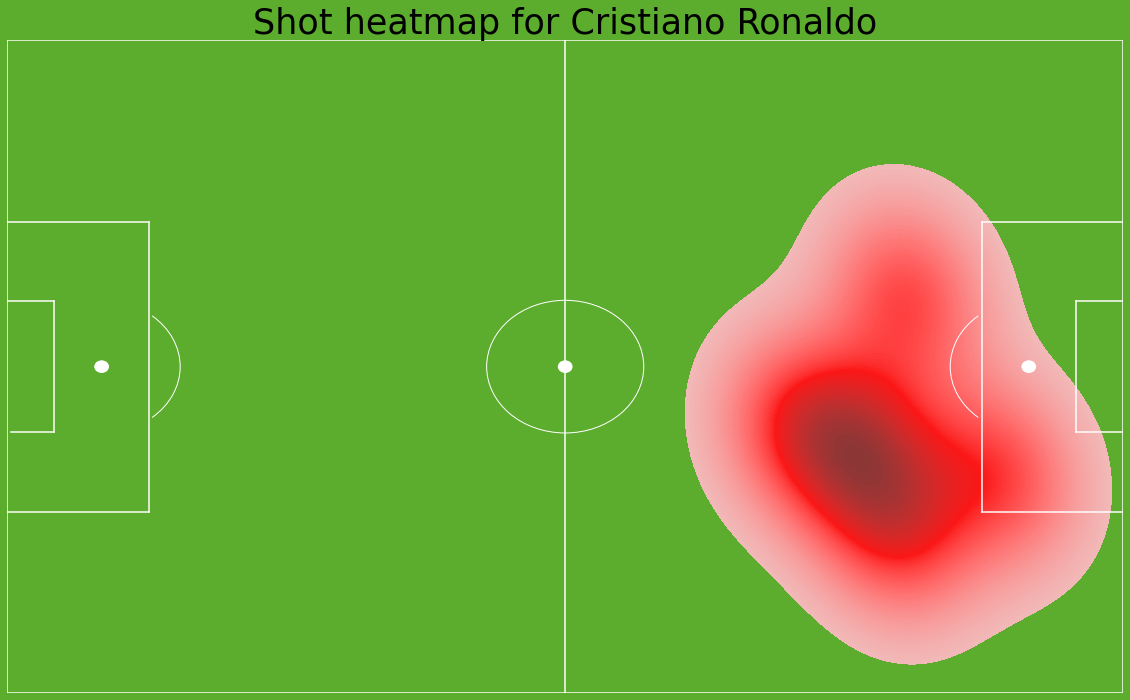

In [ ]:
ronaldo_shots = pd.DataFrame()
ronaldo_evt.dropna(subset=['location'], inplace=True)
for e in ronaldo_evt.itertuples():
  if e.evt_type['name'] == 'Shot':
    ronaldo_shots = ronaldo_shots.append({'x':e.location[0], 'y':e.location[1]},  ignore_index=True)

create_pitch(player=ronaldo_shots, player_name='ronaldo').show()

### Lionel Messi (Barcelona)

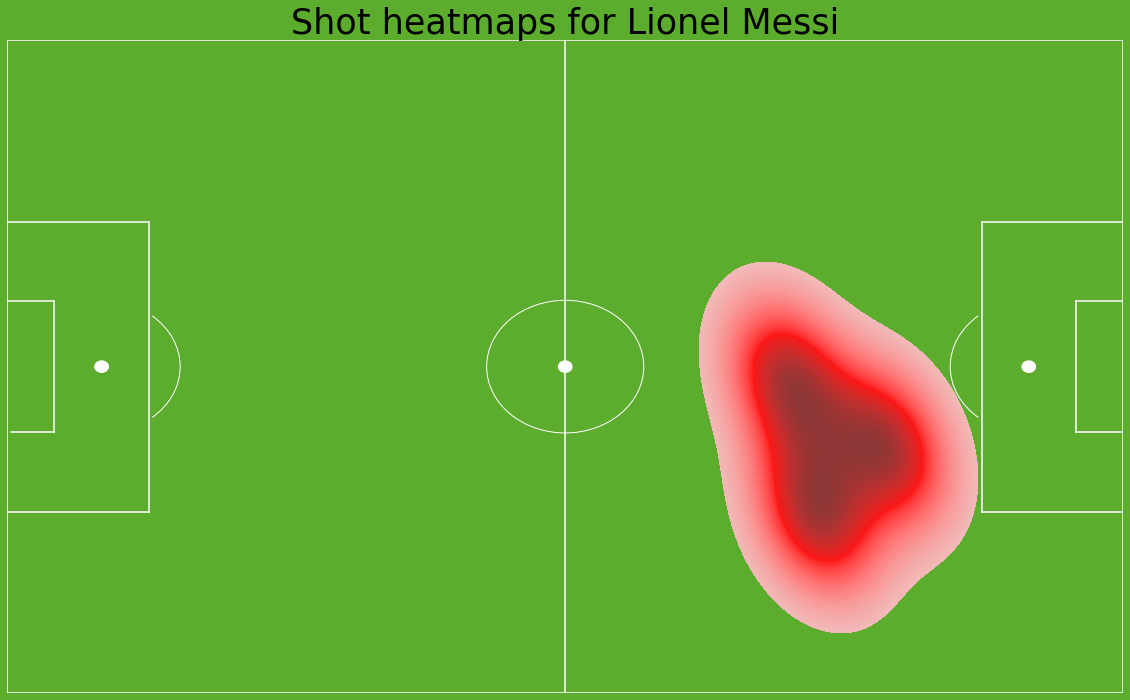

In [ ]:
messi_shots = pd.DataFrame()
messi_evt.dropna(subset=['location'], inplace=True)
for e in messi_evt.itertuples():
  if e.evt_type['name'] == 'Shot':
    messi_shots = messi_shots.append({'x':e.location[0], 'y':e.location[1]},  ignore_index=True)
create_pitch(player=messi_shots, player_name='messi').show()

## Goal Pictures

### First goal, Gerard Pique (Barcelona)

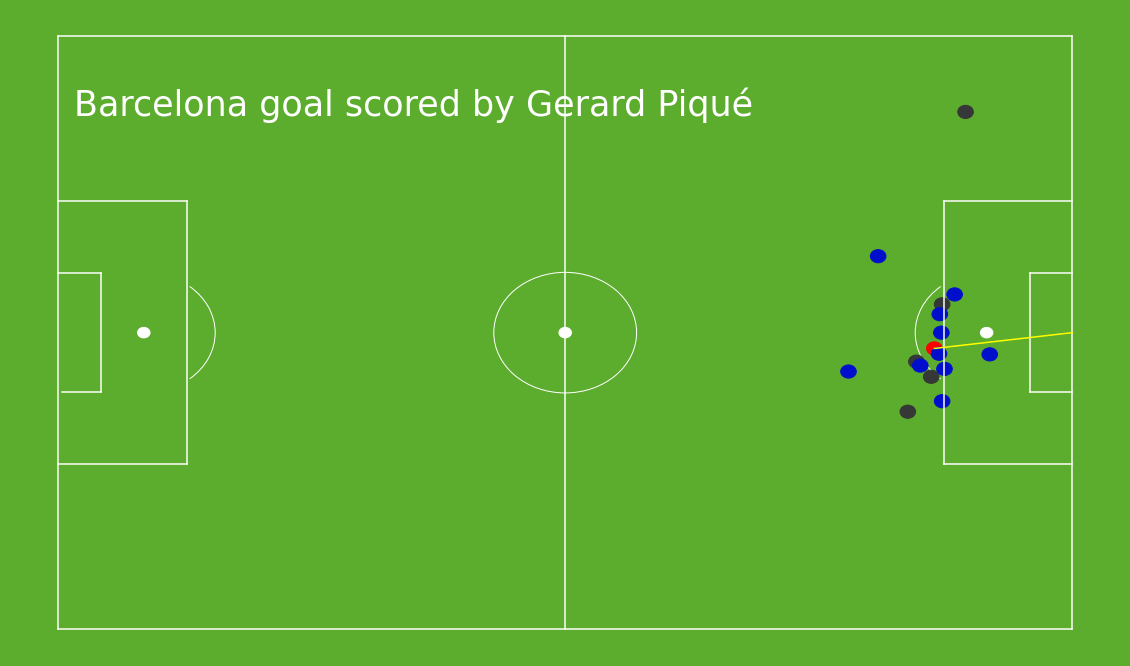

In [ ]:
goal_scorer = pd.DataFrame()
row = goal_positions.iloc[0]
goal_scorer = goal_scorer.append({'player': row.player, 'x_goal':row.location[0], 'y_goal':row.location[1]}, ignore_index=True)

goal_info = pd.DataFrame()
row = goal_positions.iloc[0]['shot_info']['freeze_frame']
for p in row:
  goal_info = goal_info.append({'x_other':p['location'][0], 'y_other':p['location'][1], 'is_teammate':p['teammate']}, ignore_index=True)


create_pitch(goal_info=goal_info, goal=goal_scorer.iloc[0], team='Barcelona').show()

### Second goal, Karim Benzema (Real Madrid)

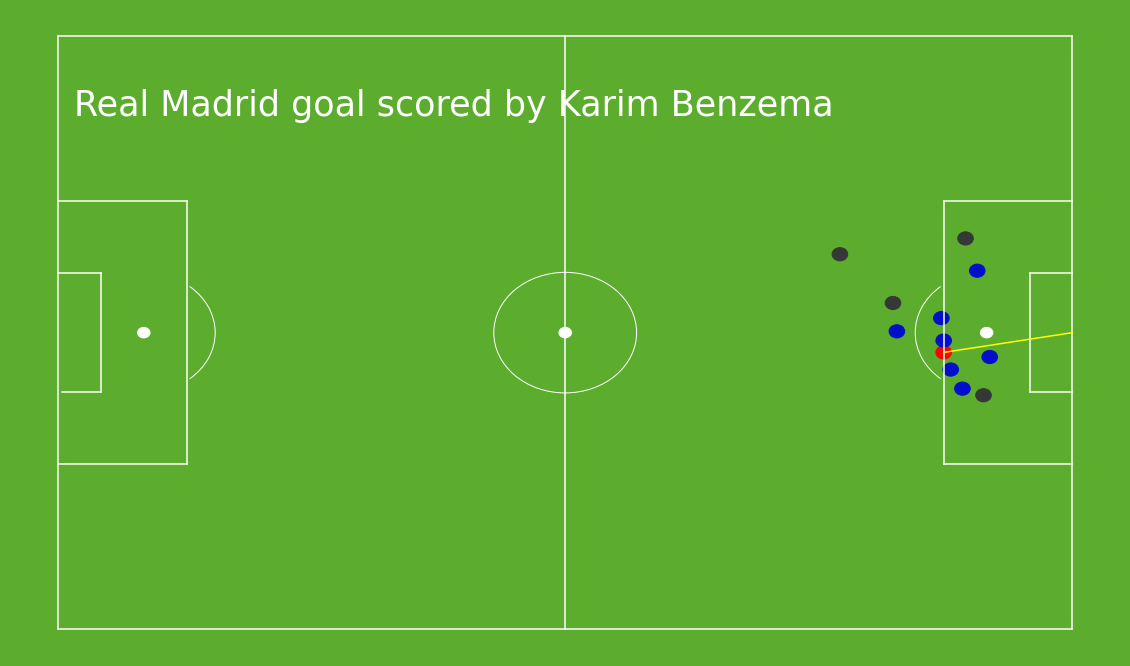

In [ ]:
goal_scorer = pd.DataFrame()
row = goal_positions.iloc[1]
goal_scorer = goal_scorer.append({'player': row.player, 'x_goal':row.location[0], 'y_goal':row.location[1]}, ignore_index=True)

goal_info = pd.DataFrame()
row = goal_positions.iloc[1]['shot_info']['freeze_frame']
for p in row:
  goal_info = goal_info.append({'x_other':p['location'][0], 'y_other':p['location'][1], 'is_teammate':p['teammate']}, ignore_index=True)


create_pitch(goal_info=goal_info, goal=goal_scorer.iloc[0], team='Real Madrid').show()

### Third goal, Cristiano Ronaldo (Real Madrid)

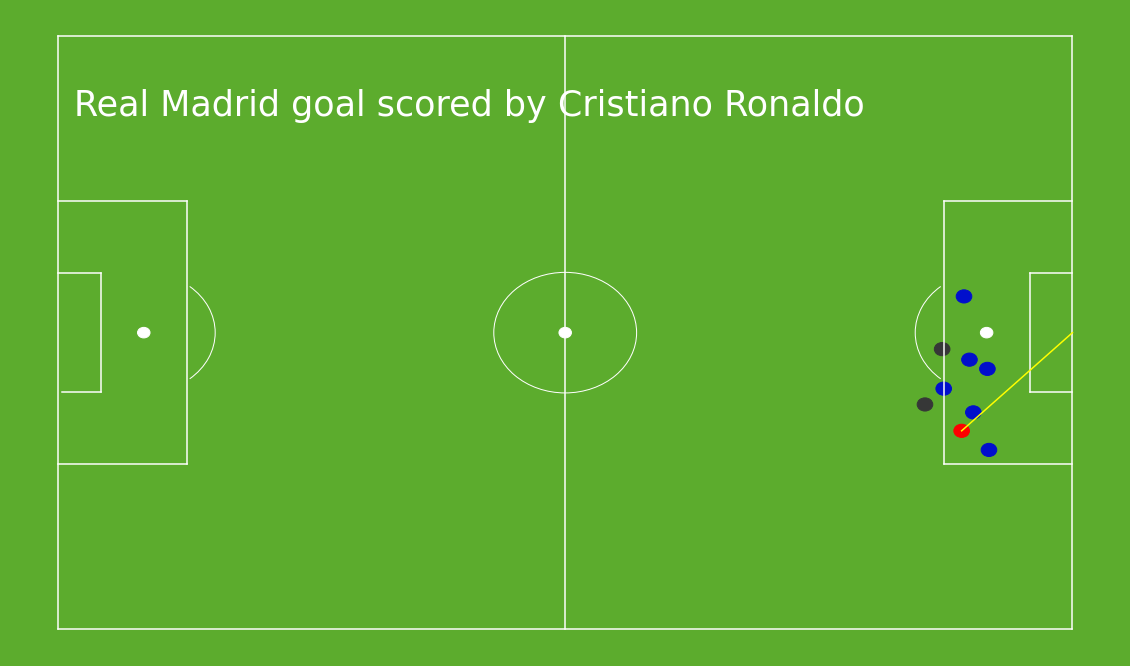

In [ ]:
goal_scorer = pd.DataFrame()
row = goal_positions.iloc[2]
goal_scorer = goal_scorer.append({'player': row.player, 'x_goal':row.location[0], 'y_goal':row.location[1]}, ignore_index=True)

goal_info = pd.DataFrame()
row = goal_positions.iloc[2]['shot_info']['freeze_frame']
for p in row:
  goal_info = goal_info.append({'x_other':p['location'][0], 'y_other':p['location'][1], 'is_teammate':p['teammate']}, ignore_index=True)


create_pitch(goal_info=goal_info, goal=goal_scorer.iloc[0], team='Real Madrid').show()